## Neuroendocrine tumor histology subtype prediction model

### Linear regression with L2 regularization method 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#data = pd.read_csv("gene_data.csv", header = 0, index_col = 0)
data = pd.read_csv("gene_data_PDWD_deID.csv",  header = 0, index_col = 0)

data = data.T
data = np.log(data+1)
data


Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
WD_0001,2.890372,6.643790,5.332719,5.010635,2.708050,3.295837,6.527958,6.837333,7.149917,1.945910,...,5.736572,6.563856,4.290459,6.214608,6.324359,3.828641,3.663562,4.736198,6.565265,5.758902
WD_0002,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
WD_0003,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
WD_0004,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142
WD_0005,2.639057,6.131226,5.572154,5.976351,3.663562,4.682131,6.643790,6.152733,6.720220,2.484907,...,5.129899,6.751101,4.430817,6.368187,6.040255,3.610918,3.688879,4.753590,5.736572,5.902633
WD_0006,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
WD_0007,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
WD_0008,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
WD_0009,2.197225,6.575076,5.283204,5.129899,5.365976,4.094345,6.935370,6.642487,6.690842,1.791759,...,5.075174,6.008813,4.317488,5.894403,6.109248,3.713572,3.784190,4.634729,5.945421,5.451038
WD_0010,2.397895,6.478510,5.323010,4.290459,6.517671,3.496508,6.700731,6.603944,6.498282,2.079442,...,5.214936,6.335054,4.779123,6.242223,6.408529,4.060443,4.143135,4.997212,6.295266,5.564520


In [7]:
y = [ 0 if d.split('_')[0] == 'WD' else 1 for d in data.index ]
y


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

### Model learning and accuracy

In [9]:
logreg = LogisticRegression(penalty='l2', solver='saga',  max_iter=1800 )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f} %'.format( logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88 %


In [10]:
pd.DataFrame(zip(X_test.index, y_test, y_pred), columns=["Sample", "Target", "Predicted"])

,Sample,Target,Predicted
0,PD_0011,1,0
1,WD_0021,0,0
2,WD_0017,0,0
3,PD_0010,1,1
4,PD_0002,1,1
5,WD_0016,0,0
6,WD_0011,0,0
7,WD_0003,0,0


In [11]:
confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[5 1]
 [0 2]]


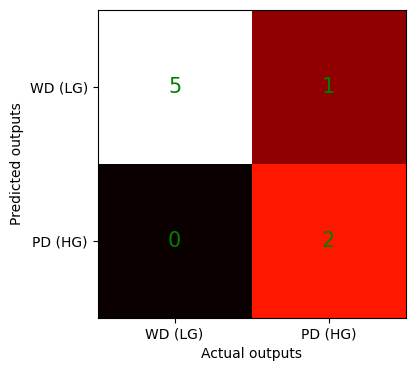

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(confusion_matrix, cmap='hot')
ax.grid(False)
ax.set_ylabel('Predicted outputs', fontsize=10, color='black')
ax.set_xlabel('Actual outputs', fontsize=10, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='green', fontsize=15)
ax.set_xticklabels(labels=["WD (LG)", "PD (HG)"], fontsize=10)
ax.set_yticklabels(labels=["WD (LG)", "PD (HG)"], fontsize=10)
plt.show()

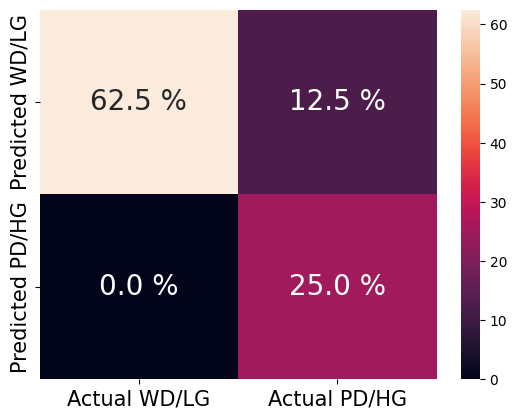

In [13]:
import seaborn as sns
df = pd.DataFrame((confusion_matrix/8)*100, columns=['Actual WD/LG', 'Actual PD/HG'], index=['Predicted WD/LG', 'Predicted PD/HG'])
ax = sns.heatmap(df, annot=True, fmt=".1f", annot_kws={"size": 20})
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("confusion_matrix_lr.png")
plt.show()

### 5-fold cross-validation

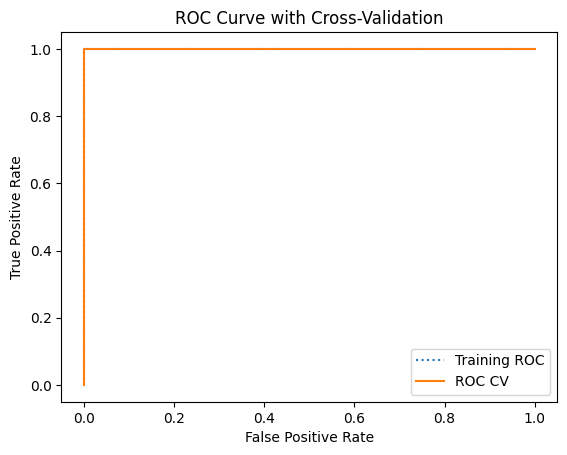

In [15]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Get the predicted probabilities for training and testing data
y_train_probs = logreg.predict_proba(X_train)[:, 1]
y_test_probs = logreg.predict_proba(X_test)[:, 1]

y_probs = cross_val_predict(logreg, X_train, y_train, method='predict_proba', cv=5)

y_probs = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr_train, tpr_train, linestyle='dotted', label='Training ROC')

plt.plot(fpr, tpr, label='ROC CV')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cross-Validation')
plt.legend()
plt.savefig("roc_curve_lr.png")
plt.show()

### Coefficient analysis

In [17]:
weights = logreg.coef_[0]
features = list(data.columns) #list(X_train.columns)

df = pd.DataFrame(zip(X_train.columns, weights), columns=["Genes","Weights"]).sort_values(by = "Weights")

df.to_csv('lr_weights_l2.csv', index=False)

In [20]:
threshold = 0.04
filtered_genes_threshold = np.array(df.loc[np.abs(df['Weights']) >= threshold, 'Genes'])

filtered_genes_threshold
#len(filtered_genes_threshold)


array(['CAMK2B', 'CACNA1D', 'WNT4', 'CACNA1H', 'MAPK10', 'GRIA3', 'PAK3',
       'FGF14', 'CACNB2', 'ZBTB16', 'BAIAP3', 'RASA4', 'MAPK8IP2',
       'MAPK8IP1', 'CCND2', 'DTX3', 'CXXC4', 'CACNA2D1', 'PRKCG', 'ARNT2',
       'PAK7', 'TSPAN7', 'COL4A3', 'CACNA1C', 'EPOR', 'TNR', 'NPM2',
       'PPP2R2B', 'PLA2G2A', 'RAD51', 'CDC25C', 'HELLS', 'MCM2', 'UBE2T',
       'CCNE1', 'COL11A1', 'MCM4', 'HOXA11', 'SPP1', 'TTK', 'DKK4',
       'EZH2', 'HIST1H3H', 'BRIP1', 'CCNB1', 'IL8', 'MYB', 'HIST1H3G',
       'LAMC2', 'DKK1', 'CDC6', 'E2F1', 'CHEK1', 'FANCA', 'HIST1H3B',
       'ZIC2', 'SFN'], dtype=object)

### Gene importance

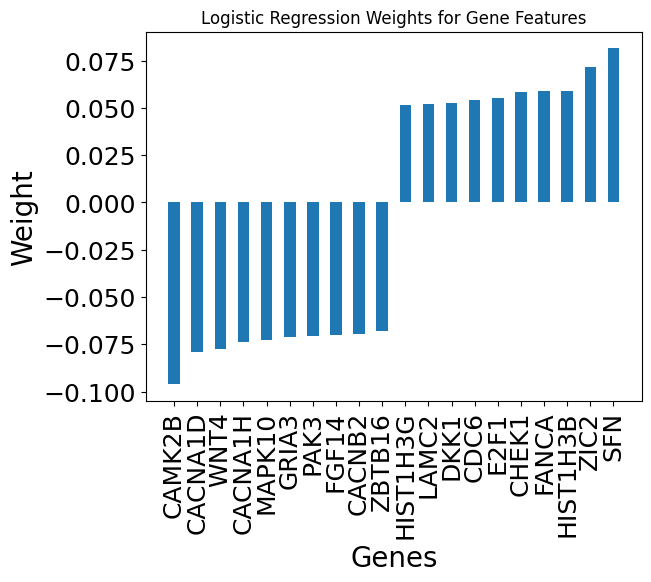

In [23]:
sorted_genes_weights = sorted(zip(features, weights), key=lambda x: x[1])
n = 10

lowest_genes = sorted_genes_weights[:n]
highest_genes = sorted_genes_weights[-n:]

# Extract the gene names and weights for the plot
gene_features = [g[0] for g in lowest_genes + highest_genes]
gene_weights = [g[1] for g in lowest_genes + highest_genes]

bar_width = 0.5
plt.bar(gene_features, gene_weights, width=bar_width)


plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)

# Add axis labels and a title
plt.xlabel('Genes', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.title('Logistic Regression Weights for Gene Features')

plt.savefig("gene_importance_lr.png")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7310e912-e0e1-4816-bf70-77f205fc24c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>